# Generate pretty plots for GLAM models

In [34]:
import glam
import pandas as pd
import numpy as np
import os.path

import matplotlib.pyplot as plt

In [35]:
import pymc3 as pm

In [36]:
np.random.seed(23) # from random.org

# MORE frame 32 participants

In [37]:
# Load data
sufix = '_individual_More_NoBin_Gamma-11_NUTS_33'
data = pd.read_csv(str('data/PF2019_data/GlamDataPF2019_More_NoBin_33.csv'))
# Subset only necessary columns
data = data[['subject', 'trial', 'choice', 'rt',
         'item_value_0', 'item_value_1',
         'gaze_0', 'gaze_1']]
data.head()

,subject,trial,choice,rt,item_value_0,item_value_1,gaze_0,gaze_1
0,1,0,1,1734.284,110,131,0.669090,0.330910
1,1,1,0,6555.370,47,50,0.759630,0.240370
2,1,2,0,3174.566,50,44,0.549371,0.450629
3,1,3,1,2877.579,57,50,0.608409,0.391591
4,1,4,1,1806.310,42,50,0.522849,0.477151


## Split data in training and test sets

In [38]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for subject in data.subject.unique():
    subject_data = data[data['subject'] == subject].copy().reset_index(drop=True)
    n_trials = len(subject_data)
    
    subject_train = subject_data.iloc[np.arange(0, n_trials, 2)].copy()
    subject_test = subject_data.iloc[np.arange(1, n_trials, 2)].copy()

    test_data = pd.concat([test_data, subject_test])
    train_data = pd.concat([train_data, subject_train])

#test_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_test'+sufix+'.csv'))
#train_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_train'+sufix+'.csv'))

print('Split data into training ({} trials) and test ({} trials) sets...'.format(len(train_data), len(test_data)))

Split data into training (1920 trials) and test (1920 trials) sets...


# Load predictions

## Full Model

In [39]:
glam_full = glam.GLAM(train_data)

# if individual

glam_full.type = "individual"

In [40]:
# Predictions
print('Predicting test set data using full GLAM...')
glam_full.exchange_data(test_data)

if not os.path.exists(str('results/predictions/glam_PF2019_full'+sufix+'.csv')):
    glam_full.predict(n_repeats=50)
    glam_full.prediction.to_csv(str('results/predictions/glam_PF2019_full'+sufix+'.csv'), index=False)
else:
    print('  Found old  full GLAM predictions in "results/predictions". Skipping prediction...')
    glam_full.prediction = pd.read_csv(str('results/predictions/glam_PF2019_full'+sufix+'.csv'))

glam_full.prediction.head()

Predicting test set data using full GLAM...
Replaced attached data (1920 trials) with new data (1920 trials)...
  Found old  full GLAM predictions in "results/predictions". Skipping prediction...


,subject,trial,repeat,choice,rt,item_value_0,gaze_0,item_value_1,gaze_1
0,1.0,0.0,0.0,1.0,3350.0,47,0.75963,50,0.24037
1,1.0,0.0,1.0,0.0,1883.0,47,0.75963,50,0.24037
2,1.0,0.0,2.0,0.0,6859.0,47,0.75963,50,0.24037
3,1.0,0.0,3.0,1.0,2741.0,47,0.75963,50,0.24037
4,1.0,0.0,4.0,0.0,3678.0,47,0.75963,50,0.24037


## No-bias

In [29]:
glam_nobias = glam.GLAM(train_data)

In [30]:
# Predictions
print('Predicting test set data using no-bias GLAM...')
glam_nobias.exchange_data(test_data)
 
if not os.path.exists(str('results/predictions/glam_FF2018_nobias'+sufix+'.csv')):
     glam_nobias.predict(n_repeats=50)
     glam_nobias.prediction.to_csv(str('results/predictions/glam_FF2018_nobias'+sufix+'.csv'), index=False)
else:
     print('  Found old  no-bias GLAM predictions in "results/predictions". Skipping prediction...')
     glam_nobias.prediction = pd.read_csv(str('results/predictions/glam_FF2018_nobias'+sufix+'.csv'))
glam_nobias.prediction.head()

Predicting test set data using no-bias GLAM...
Replaced attached data (1920 trials) with new data (1920 trials)...


AttributeError: 'GLAM' object has no attribute 'type'

Close Figure to continue...


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'
  seen=seen, canon=canonical, used=seen[-1]))


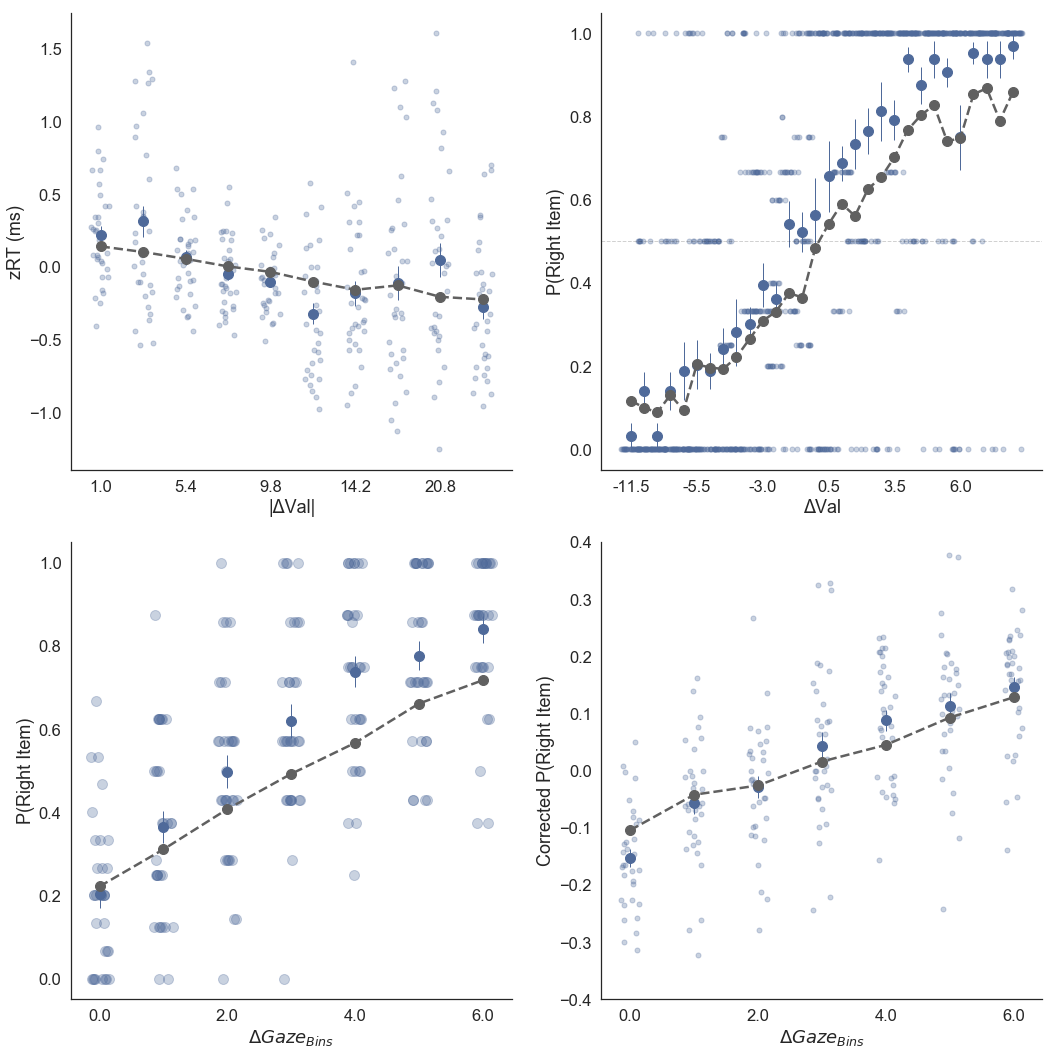

In [43]:
print('Close Figure to continue...')
glam.plots_pretty.plot_fit(test_data, [glam_full.prediction], color_data = '#4F6A9A');
#glam.plot_fit(test_dat|a, [glam_full.prediction,glam_nobias.prediction], color_data = '#4F6A9A' );
plt.show()
# Shown dots containing the mean observed for that segment bin for those participants

In [32]:
# Mode to update!!!!

---------------------------------------------------------
# LESS frame NUTS 32

In [44]:
# Load data
sufix = '_individual_Less_NoBin_Gamma-11_NUTS_33'
#sufix = '_Dislike_NoBin_Dislike_NUTS_Inv_31'
data = pd.read_csv(str('data/PF2019_data/GlamDataPF2019_Less_NoBin_33.csv'))
# Subset only necessary columns
data = data[['subject', 'trial', 'choice', 'rt',
         'item_value_0', 'item_value_1',
         'gaze_0', 'gaze_1']]
data.head()

,subject,trial,choice,rt,item_value_0,item_value_1,gaze_0,gaze_1
0,1,0,0,4261.735,110,131,0.603448,0.396552
1,1,1,1,3559.258,47,50,0.490772,0.509228
2,1,2,1,3754.464,50,44,0.490893,0.509107
3,1,3,0,2431.751,57,50,0.639125,0.360875
4,1,4,0,2199.342,42,50,0.702232,0.297768


## Split data in training and test sets

In [45]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for subject in data.subject.unique():
    subject_data = data[data['subject'] == subject].copy().reset_index(drop=True)
    n_trials = len(subject_data)
    
    subject_train = subject_data.iloc[np.arange(0, n_trials, 2)].copy()
    subject_test = subject_data.iloc[np.arange(1, n_trials, 2)].copy()

    test_data = pd.concat([test_data, subject_test])
    train_data = pd.concat([train_data, subject_train])

#test_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_test'+sufix+'.csv'))
#train_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_train'+sufix+'.csv'))

print('Split data into training ({} trials) and test ({} trials) sets...'.format(len(train_data), len(test_data)))

Split data into training (1920 trials) and test (1920 trials) sets...


# Load predictions

## Full Model

In [46]:
glam_full = glam.GLAM(train_data)
glam_full.type = "individual"

In [47]:
# Predictions
print('Predicting test set data using full GLAM...')
glam_full.exchange_data(test_data)

if not os.path.exists(str('results/predictions/glam_PF2019_full'+sufix+'.csv')):
    glam_full.predict(n_repeats=50)
    glam_full.prediction.to_csv(str('results/predictions/glam_PF2019_full'+sufix+'.csv'), index=False)
else:
    print('  Found old  full GLAM predictions in "results/predictions". Skipping prediction...')
    glam_full.prediction = pd.read_csv(str('results/predictions/glam_PF2019_full'+sufix+'.csv'))

glam_full.prediction.head()

Predicting test set data using full GLAM...
Replaced attached data (1920 trials) with new data (1920 trials)...
  Found old  full GLAM predictions in "results/predictions". Skipping prediction...


,subject,trial,repeat,choice,rt,item_value_0,gaze_0,item_value_1,gaze_1
0,1.0,0.0,0.0,1.0,3310.0,47,0.490772,50,0.509228
1,1.0,0.0,1.0,0.0,2781.0,47,0.490772,50,0.509228
2,1.0,0.0,2.0,0.0,1608.0,47,0.490772,50,0.509228
3,1.0,0.0,3.0,1.0,4290.0,47,0.490772,50,0.509228
4,1.0,0.0,4.0,0.0,3031.0,47,0.490772,50,0.509228


## No-bias

In [20]:
glam_nobias = glam.GLAM(train_data)

In [21]:
# Predictions
print('Predicting test set data using no-bias GLAM...')
glam_nobias.exchange_data(test_data)
 
if not os.path.exists(str('results/predictions/glam_PF2018_nobias'+sufix+'.csv')):
     glam_nobias.predict(n_repeats=50)
     glam_nobias.prediction.to_csv(str('results/predictions/glam_PF2018_nobias'+sufix+'.csv'), index=False)
else:
     print('  Found old  no-bias GLAM predictions in "results/predictions". Skipping prediction...')
     glam_nobias.prediction = pd.read_csv(str('results/predictions/glam_PF2018_nobias'+sufix+'.csv'))
glam_nobias.prediction.head()

Predicting test set data using no-bias GLAM...
Replaced attached data (1920 trials) with new data (1920 trials)...


AttributeError: 'GLAM' object has no attribute 'type'

Close Figure to continue...


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'
  seen=seen, canon=canonical, used=seen[-1]))


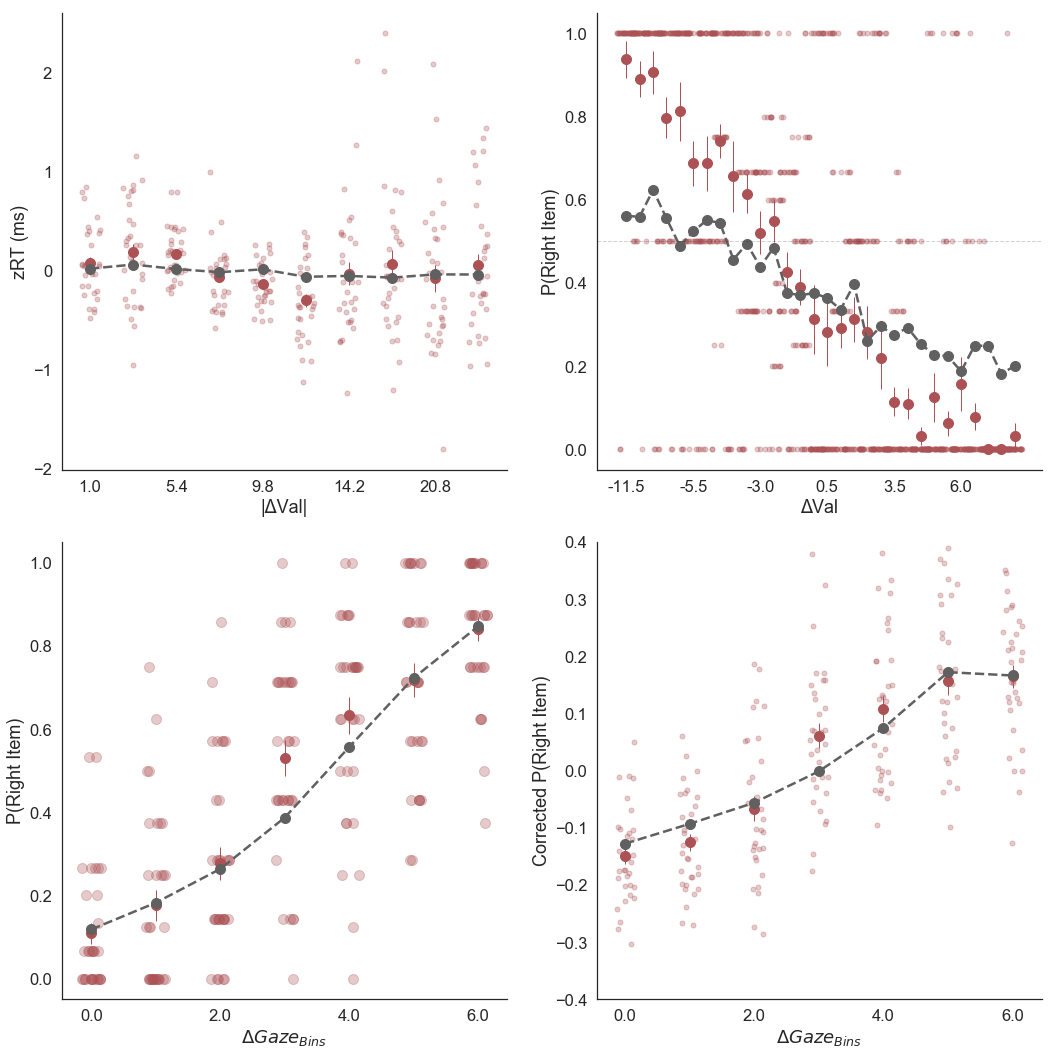

In [48]:
print('Close Figure to continue...')
glam.plots_pretty.plot_fit(test_data, [glam_full.prediction], color_data = '#AC5255');
#glam.plot_fit(test_data, [glam_full.prediction,glam_nobias.prediction], color_data = '#AC5255' );
plt.show()
# Shown dots containing the mean observed for that segment bin for those participants

---------------------------------------------------------
# LESS frame Inverted NUTS 33

In [49]:
# Load data
sufix = '_individual_Less_Inv_NoBin_Gamma-11_NUTS_33'
data = pd.read_csv(str('data/PF2019_data/GlamDataPF2019_Less_Inv_NoBin_33.csv'))
# Subset only necessary columns
data = data[['subject', 'trial', 'choice', 'rt',
         'item_value_0', 'item_value_1',
         'gaze_0', 'gaze_1']]
data.head()

,subject,trial,choice,rt,item_value_0,item_value_1,gaze_0,gaze_1
0,1,0,0,4261.735,63,42,0.603448,0.396552
1,1,1,1,3559.258,126,123,0.490772,0.509228
2,1,2,1,3754.464,123,129,0.490893,0.509107
3,1,3,0,2431.751,116,123,0.639125,0.360875
4,1,4,0,2199.342,131,123,0.702232,0.297768


## Split data in training and test sets

In [50]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for subject in data.subject.unique():
    subject_data = data[data['subject'] == subject].copy().reset_index(drop=True)
    n_trials = len(subject_data)
    
    subject_train = subject_data.iloc[np.arange(0, n_trials, 2)].copy()
    subject_test = subject_data.iloc[np.arange(1, n_trials, 2)].copy()

    test_data = pd.concat([test_data, subject_test])
    train_data = pd.concat([train_data, subject_train])

#test_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_test'+sufix+'.csv'))
#train_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_train'+sufix+'.csv'))

print('Split data into training ({} trials) and test ({} trials) sets...'.format(len(train_data), len(test_data)))

Split data into training (1920 trials) and test (1920 trials) sets...


# Load predictions

## Full Model

In [51]:
glam_full = glam.GLAM(train_data)

In [52]:
# Predictions
print('Predicting test set data using full GLAM...')
glam_full.exchange_data(test_data)

if not os.path.exists(str('results/predictions/glam_PF2019_full'+sufix+'.csv')):
    glam_full.predict(n_repeats=50)
    glam_full.prediction.to_csv(str('results/predictions/glam_PF2019_full'+sufix+'.csv'), index=False)
else:
    print('  Found old  full GLAM predictions in "results/predictions". Skipping prediction...')
    glam_full.prediction = pd.read_csv(str('results/predictions/glam_PF2019_full'+sufix+'.csv'))

glam_full.prediction.head()

Predicting test set data using full GLAM...
Replaced attached data (1920 trials) with new data (1920 trials)...
  Found old  full GLAM predictions in "results/predictions". Skipping prediction...


,subject,trial,repeat,choice,rt,item_value_0,gaze_0,item_value_1,gaze_1
0,1.0,0.0,0.0,1.0,3826.0,126,0.490772,123,0.509228
1,1.0,0.0,1.0,0.0,2485.0,126,0.490772,123,0.509228
2,1.0,0.0,2.0,0.0,7978.0,126,0.490772,123,0.509228
3,1.0,0.0,3.0,1.0,3229.0,126,0.490772,123,0.509228
4,1.0,0.0,4.0,0.0,4554.0,126,0.490772,123,0.509228


## No-bias

In [27]:
glam_nobias = glam.GLAM(train_data)

In [28]:
# Predictions
print('Predicting test set data using no-bias GLAM...')
glam_nobias.exchange_data(test_data)
 
if not os.path.exists(str('results/predictions/glam_PF2019_nobias'+sufix+'.csv')):
     glam_nobias.predict(n_repeats=50)
     glam_nobias.prediction.to_csv(str('results/predictions/glam_PF2019_nobias'+sufix+'.csv'), index=False)
else:
     print('  Found old no-bias GLAM predictions in "results/predictions". Skipping prediction...')
     glam_nobias.prediction = pd.read_csv(str('results/predictions/glam_PF2019_nobias'+sufix+'.csv'))
glam_nobias.prediction.head()

Predicting test set data using no-bias GLAM...
Replaced attached data (1920 trials) with new data (1920 trials)...


AttributeError: 'GLAM' object has no attribute 'type'

Close Figure to continue...


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'
  seen=seen, canon=canonical, used=seen[-1]))


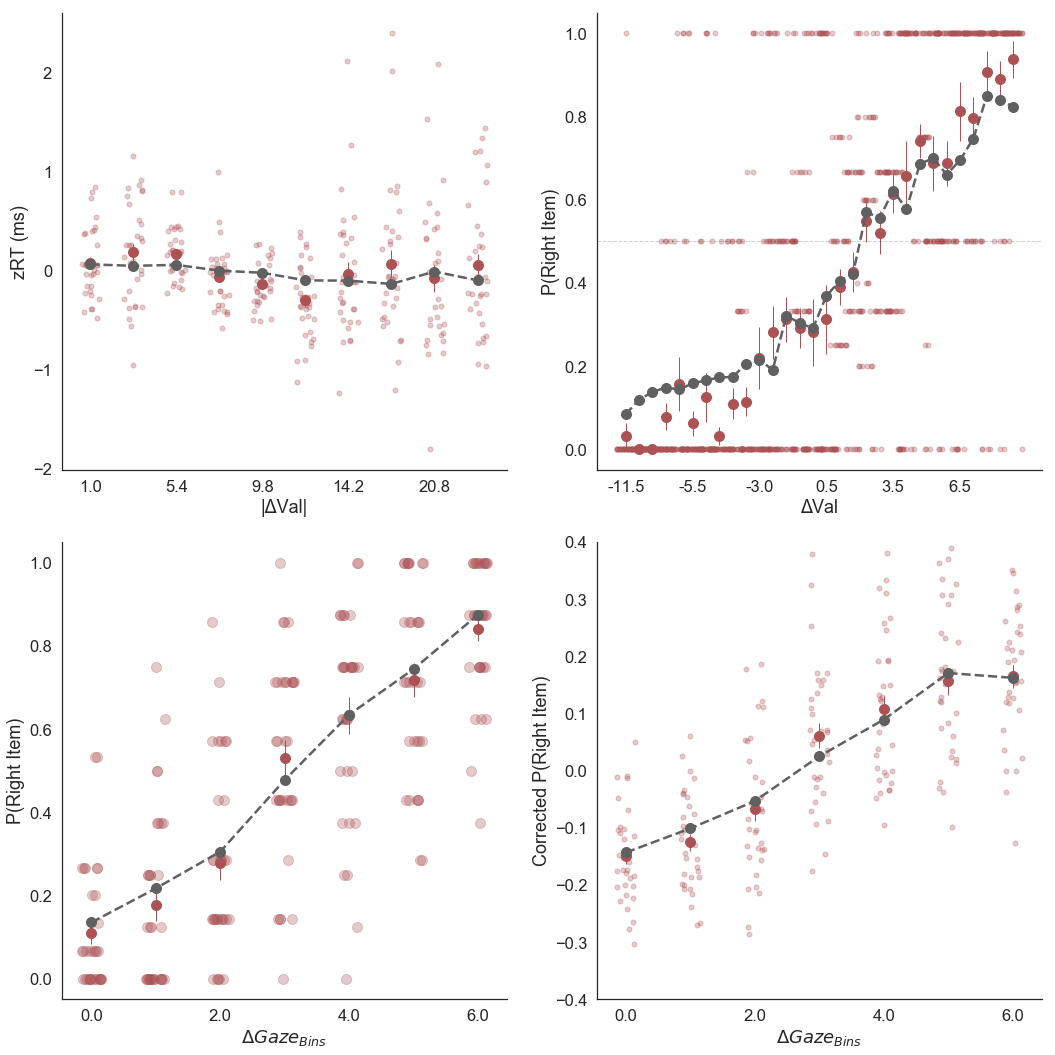

In [53]:
print('Close Figure to continue...')
#glam.plot_fit(test_data, [glam_full.prediction], color_data = '#AC5255');
glam.plots_pretty.plot_fit(test_data, [glam_full.prediction], color_data = '#AC5255');

#glam.plot_fit(test_data, [glam_full.prediction,glam_nobias.prediction], color_data = '#AC5255' );
plt.show()
# Shown dots containing the mean observed for that segment bin for those participants

## REMEMBER THIS CASE IS NEGATIVE DELTA VALUE BECAUSE IT IS THE INVERTED CASE